In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

In [4]:
garminconnect_df = pd.read_csv("../data/processed/20250313_1503_garminconnect_df_cleaned_sentiment_textblob.csv")

In [5]:
garminconnect_df['sentiment_label_encoded'] = garminconnect_df['sentiment_label'].map({'positive': 1, 'negative': 0, 'neutral': 2})
garminconnect_df = garminconnect_df[garminconnect_df['sentiment_label_encoded'] != 2]

In [6]:
X = garminconnect_df['clean_content']
y = garminconnect_df['sentiment_label_encoded']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

start = timer()
X_train_tfidf = tfidf_vectorizer.fit_transform(xtrain)
X_test_tfidf = tfidf_vectorizer.transform(xtest)
print("TF-IDF Vectorization Time:", timer() - start)

TF-IDF Vectorization Time: 0.7708327460022701


In [8]:
svm = LinearSVC()
lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=0)

print("\nTraining Models:")
start = timer(); svm.fit(X_train_tfidf, ytrain); print("SVM:", timer() - start)
start = timer(); lr.fit(X_train_tfidf, ytrain); print("Logistic Regression:", timer() - start)
start = timer(); nb.fit(X_train_tfidf, ytrain); print("Naive Bayes:", timer() - start)
start = timer(); xgb.fit(X_train_tfidf, ytrain); print("XGBoost:", timer() - start)
start = timer(); rf.fit(X_train_tfidf, ytrain); print("Random Forest:", timer() - start)

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    return acc

acc_svm = evaluate_model(svm, X_test_tfidf, ytest, "Linear SVM")
acc_lr = evaluate_model(lr, X_test_tfidf, ytest, "Logistic Regression")
acc_nb = evaluate_model(nb, X_test_tfidf, ytest, "Naive Bayes")
acc_xgb = evaluate_model(xgb, X_test_tfidf, ytest, "XGBoost")
acc_rf = evaluate_model(rf, X_test_tfidf, ytest, "Random Forest")


Training Models:
SVM: 0.1271037940023234
Logistic Regression: 0.10806080100155668
Naive Bayes: 0.009392465002747485


/home/miellilas/Documents/pba/googleplay_garminconnect/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:36:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 10.43762014299864
Random Forest: 0.35132761299973936

Linear SVM Results:
Accuracy: 0.9870 | Precision: 0.9909 | Recall: 0.9943 | F1 Score: 0.9926
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      2183
           1       0.99      0.99      0.99     16368

    accuracy                           0.99     18551
   macro avg       0.97      0.96      0.97     18551
weighted avg       0.99      0.99      0.99     18551

Confusion Matrix:
 [[ 2034   149]
 [   93 16275]]

Logistic Regression Results:
Accuracy: 0.9801 | Precision: 0.9813 | Recall: 0.9965 | F1 Score: 0.9888
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      2183
           1       0.98      1.00      0.99     16368

    accuracy                           0.98     18551
   macro avg       0.98      0.93      0.95     18551
weighted avg       0.98      0.98      0.98 

/home/miellilas/Documents/pba/googleplay_garminconnect/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/miellilas/Documents/pba/googleplay_garminconnect/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/miellilas/Documents/pba/googleplay_garminconnect/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

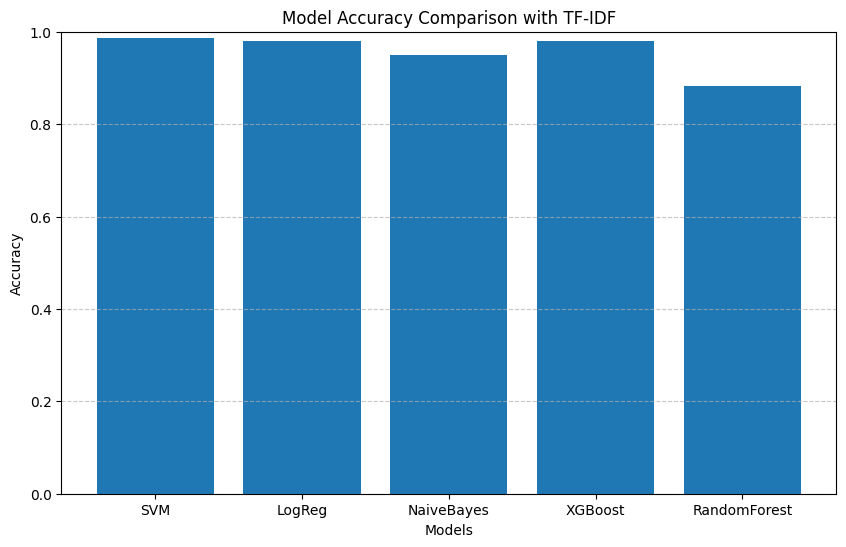

In [9]:
model_names = ['SVM', 'LogReg', 'NaiveBayes', 'XGBoost', 'RandomForest']
accuracies = [acc_svm, acc_lr, acc_nb, acc_xgb, acc_rf]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with TF-IDF")
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()